In [62]:
## Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
import statsmodels.formula.api as smf

In [63]:
## Importing data
path = 'experiments_data.csv'
df = pd.read_csv(path)

In [64]:
df.head()

,respondent_id,age,gender,location,group,enrolled,last_update,level,number_check,time_spent_in_treatment_or_control,...,pre_determined,post_determined,pre_attentive,post_attentive,pre_jittery,post_jittery,pre_active,post_active,pre_afraid,post_afraid
0,24,26,female,United States,ROO,2018-11-17 01:18:38.708246+00:00,2018-11-17 01:21:51.608501+00:00,7,0,0.000000,...,4,4,4,3,2,0,3,2,2,2
1,25,25,male,United States,RO,2018-11-17 01:22:27.974986+00:00,2018-11-17 01:23:18.119645+00:00,6,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,26,25,female,United States,RO,2018-11-17 01:32:38.782377+00:00,2018-11-17 01:36:05.459238+00:00,7,0,0.000000,...,0,2,0,3,0,1,0,4,0,1
3,27,32,male,Kenya,ROXO,2018-11-17 01:46:18.703943+00:00,2018-11-17 01:46:18.917251+00:00,2,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,28,28,female,United States,ROXO,2018-11-17 01:47:34.454053+00:00,2018-11-17 01:53:51.607042+00:00,6,0,238.225232,...,5,0,3,0,1,0,4,0,2,0


# EDA

In [65]:
df.describe()

,respondent_id,age,level,number_check,time_spent_in_treatment_or_control,pre_positive_affect,pre_negative_affect,post_positive_affect,post_negative_affect,pre_interested,...,pre_determined,post_determined,pre_attentive,post_attentive,pre_jittery,post_jittery,pre_active,post_active,pre_afraid,post_afraid
count,216.000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,131.500,29.518519,5.814815,1.523148,-506.799683,18.837963,11.791667,18.458333,11.356481,2.069444,...,2.083333,2.004630,1.990741,2.129630,1.115741,1.074074,1.763889,1.819444,1.222222,1.171296
std,62.498,11.359644,1.870944,2.885315,11847.484556,17.120004,11.448901,15.523070,10.266122,1.902212,...,1.998255,1.782336,1.904684,1.802286,1.276089,1.118169,1.777061,1.619587,1.359434,1.217435
min,24.000,-26.000000,2.000000,0.000000,-171805.884524,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.750,25.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,131.500,28.000000,7.000000,0.000000,0.000000,24.000000,12.000000,21.000000,10.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.500000,2.000000,1.000000,1.000000
75%,185.250,30.000000,7.000000,0.000000,170.969470,33.000000,21.000000,31.000000,18.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000
max,239.000,99.000000,7.000000,7.000000,24735.092758,50.000000,42.000000,50.000000,41.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5,1,'Participant Age Distribution')

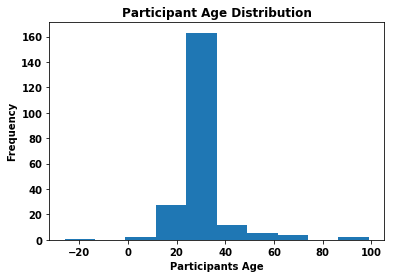

In [66]:
# plotting distribution of age
df.age.hist(grid=False)
plt.xlabel('Participants Age')
plt.ylabel('Frequency')
plt.title('Participant Age Distribution')

Text(0.5,1,'Participant Group Distribution')

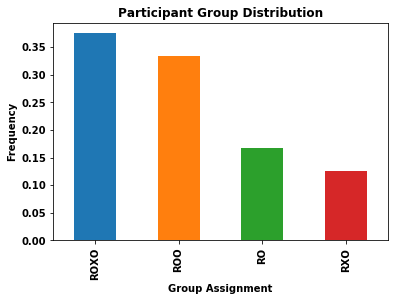

In [67]:
# plotting distribution of groups
ratio_of_groups = df['group'].value_counts()/sum(df['group'].value_counts())
ratio_of_groups.plot(kind='bar')
plt.xlabel('Group Assignment')
plt.ylabel('Frequency')
plt.title('Participant Group Distribution')

In [68]:
df.head()

,respondent_id,age,gender,location,group,enrolled,last_update,level,number_check,time_spent_in_treatment_or_control,...,pre_determined,post_determined,pre_attentive,post_attentive,pre_jittery,post_jittery,pre_active,post_active,pre_afraid,post_afraid
0,24,26,female,United States,ROO,2018-11-17 01:18:38.708246+00:00,2018-11-17 01:21:51.608501+00:00,7,0,0.000000,...,4,4,4,3,2,0,3,2,2,2
1,25,25,male,United States,RO,2018-11-17 01:22:27.974986+00:00,2018-11-17 01:23:18.119645+00:00,6,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,26,25,female,United States,RO,2018-11-17 01:32:38.782377+00:00,2018-11-17 01:36:05.459238+00:00,7,0,0.000000,...,0,2,0,3,0,1,0,4,0,1
3,27,32,male,Kenya,ROXO,2018-11-17 01:46:18.703943+00:00,2018-11-17 01:46:18.917251+00:00,2,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,28,28,female,United States,ROXO,2018-11-17 01:47:34.454053+00:00,2018-11-17 01:53:51.607042+00:00,6,0,238.225232,...,5,0,3,0,1,0,4,0,2,0


In [69]:
## Looking into Attrition

In [70]:
df_ROXO = df[(df.group.isin(['ROXO']))]

In [54]:
df_ROXO.groupby('gender').count()

,respondent_id,age,location,group,enrolled,last_update,level,number_check,time_spent_in_treatment_or_control,pre_positive_affect,...,pre_determined,post_determined,pre_attentive,post_attentive,pre_jittery,post_jittery,pre_active,post_active,pre_afraid,post_afraid
gender,,,,,,,,,,,,,,,,,,,,,
female,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
male,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


In [55]:
df_ROXO_v1 = df[((df.group.isin(['ROXO'])) & (df.level == 7))]

In [56]:
df_ROXO_v1.groupby('gender').count()

,respondent_id,age,location,group,enrolled,last_update,level,number_check,time_spent_in_treatment_or_control,pre_positive_affect,...,pre_determined,post_determined,pre_attentive,post_attentive,pre_jittery,post_jittery,pre_active,post_active,pre_afraid,post_afraid
gender,,,,,,,,,,,,,,,,,,,,,
female,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
male,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


# Data Cleaning

In [77]:
## Remove age 99, 1

In [84]:
df = df[df.age != 99]
df = df[df.age != 1]

In [87]:
## Change -26 age value to 26. The person completed the survey might be a mistake in entry.

In [89]:
df['age'] = np.where(df['age']== -26, 26, df['age'])

Notes:
* 1. Remove people assigned to treatment but did not get the correct number check and who do not get to level 7
* 2. Remove people in the control group who did not get to level 7

### 1

In [95]:
df_ROXO = df[((df.group.isin(['ROXO'])) & (df.level == 7))]

In [96]:
df_RXO = df[((df.group.isin(['RXO'])) &  (df.level == 7))]

### 2.

In [97]:
df_ROO =  df[((df.group.isin(['ROO'])) & (df.level == 7) ) ]

In [98]:
df_RO = df[((df.group.isin(['RO'])) & (df.level == 7) ) ]

In [99]:
## Calculating Treatment effect, y

In [103]:
df_ROXO['y_positive'] = df_ROXO['post_positive_affect'] -  df_ROXO['pre_positive_affect']
df_RXO['y_positive'] = df_RXO['post_positive_affect'] -  df_RXO['pre_positive_affect']
df_ROO['y_positive'] = df_ROO['post_positive_affect'] -  df_ROO['pre_positive_affect']
df_RO['y_positive'] = df_RO['post_positive_affect'] -  df_RO['pre_positive_affect']

df_ROXO['y_negative'] = df_ROXO['post_negative_affect'] -  df_ROXO['pre_negative_affect']
df_RXO['y_negative'] = df_RXO['post_negative_affect'] -  df_RXO['pre_negative_affect']
df_ROO['y_negative'] = df_ROO['post_negative_affect'] -  df_ROO['pre_negative_affect']
df_RO['y_negative'] = df_RO['post_negative_affect'] -  df_RO['pre_negative_affect']


df_ROXO['y_net'] = df_ROXO['y_positive'] -  df_ROXO['y_negative']
df_RXO['y_net'] = df_RXO['y_positive'] -  df_RXO['y_negative']
df_ROO['y_net'] = df_ROO['y_positive'] -  df_ROO['y_negative']
df_RO['y_net'] = df_RO['y_positive'] -  df_RO['y_negative']


C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [104]:
## Recombining all the dataframes
df_clean = pd.concat([df_RO, df_ROO, df_ROXO, df_RXO])

# Analysis

In [111]:
df_clean.groupby('group')['y_net'].mean()

group
RO      13.043478
ROO      2.771930
ROXO    -4.413043
RXO      1.250000
Name: y_net, dtype: float64

In [ ]:
## Attempting to normalize the distributions to have a better t test analysis

(array([4., 2., 3., 2., 1., 2., 0., 4., 3., 2.]),
 array([-2. ,  1.2,  4.4,  7.6, 10.8, 14. , 17.2, 20.4, 23.6, 26.8, 30. ]),
 <a list of 10 Patch objects>)

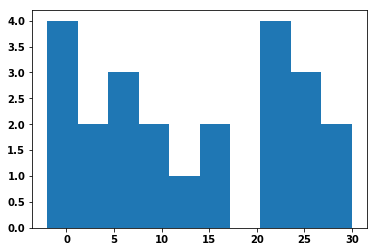

In [158]:
plt.hist(df_RO.y_net)

(array([21.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.35335283e-01, 1.06864746e+12, 2.13729492e+12, 3.20594237e+12,
        4.27458983e+12, 5.34323729e+12, 6.41188475e+12, 7.48053221e+12,
        8.54917967e+12, 9.61782712e+12, 1.06864746e+13]),
 <a list of 10 Patch objects>)

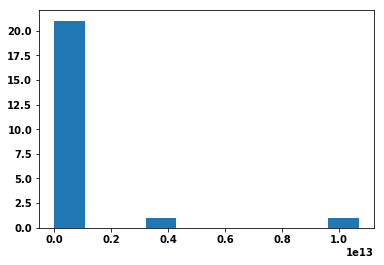

In [160]:
ro_normal = df_RO.y_net.apply(lambda x: np.exp(x))
ro_normal.replace([np.inf, -np.inf], np.nan, inplace=True)
ro_normal.dropna(inplace=True)

plt.hist(ro_normal)

In [ ]:
## T Test to look into the different groups and determine if we can collapse them

In [ ]:
## Control groups

In [161]:
## We reject the Ho, means are not equal
import scipy
scipy.stats.ttest_ind(df_RO.post_positive_affect, df_ROO.post_positive_affect, equal_var=False)

Ttest_indResult(statistic=-0.5455336409750448, pvalue=0.5889985200914156)

In [162]:
scipy.stats.ttest_ind(df_RO.post_negative_affect, df_ROO.post_negative_affect, equal_var=False)

Ttest_indResult(statistic=-0.2406628328487015, pvalue=0.8106365737048619)

In [ ]:
## Treatment groups

In [164]:
## We cannot reject the Ho, so we can assume the means are equal
scipy.stats.ttest_ind(df_ROXO.post_positive_affect, df_RXO.post_positive_affect, equal_var=False)

Ttest_indResult(statistic=0.7942903552190325, pvalue=0.433938438092911)

In [165]:
scipy.stats.ttest_ind(df_ROXO.post_negative_affect, df_RXO.post_negative_affect, equal_var=False)

Ttest_indResult(statistic=-1.9445042646773587, pvalue=0.06507728109941102)

In [142]:
a = smf.ols('y_net ~   group ', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,13.0435,2.279,5.724,0.000,8.577,17.509
group[T.ROO],-10.2715,2.445,-4.200,0.000,-15.065,-5.479
group[T.ROXO],-17.4565,2.601,-6.712,0.000,-22.554,-12.359
group[T.RXO],-11.7935,4.710,-2.504,0.012,-21.025,-2.562


In [134]:
a = smf.ols('y_net ~ group + C(location) + group*C(location)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,9.8304,3.071,3.201,0.001,3.811,15.850
group[T.ROO],-3.2304,4.341,-0.744,0.457,-11.739,5.278
group[T.ROXO],-8.3304,3.960,-2.104,0.035,-16.092,-0.568
group[T.RXO],-8.8304,6.437,-1.372,0.170,-21.446,3.786
C(location)[T.Kenya],7.4196,3.564,2.082,0.037,0.435,14.405
C(location)[T.United States],-1.3758,3.518,-0.391,0.696,-8.271,5.519
group[T.ROO]:C(location)[T.Kenya],-10.4482,4.940,-2.115,0.034,-20.131,-0.765
group[T.ROXO]:C(location)[T.Kenya],-14.1196,4.970,-2.841,0.004,-23.861,-4.379
group[T.RXO]:C(location)[T.Kenya],11.5804,13.788,0.840,0.401,-15.444,38.605
group[T.ROO]:C(location)[T.United States],-3.6113,4.760,-0.759,0.448,-12.941,5.719


In [166]:
## Since we are assuming all the means are equal when running t test for only the post survey, we will collapse the post positive and negative
## responses and look at the treatment effect

In [179]:
df_ROXO['y_post'] = df_ROXO['post_positive_affect'] - df_ROXO['post_negative_affect']
df_RXO['y_post'] = df_RXO['post_positive_affect'] - df_RXO['post_negative_affect']
df_treatment = pd.concat([df_ROXO, df_RXO])
df_treatment['assign'] = 't'


df_ROO['y_post'] = df_ROO['post_positive_affect'] - df_ROO['post_negative_affect']
df_RO['y_post'] = df_RO['post_positive_affect'] - df_RO['post_negative_affect']
df_control = pd.concat([df_ROO, df_RO])
df_control['assign'] = 'c'

C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hamsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [180]:
## combine treatment and control df to one df
df_clean = pd.concat([df_treatment, df_control])

In [183]:
a = smf.ols('y_post ~   assign ', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,13.8250,1.301,10.623,0.000,11.274,16.376
assign[T.t],-6.9218,2.153,-3.215,0.001,-11.141,-2.702


In [189]:
a = smf.ols('y_post ~   assign + C(gender)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,13.8802,1.522,9.119,0.000,10.897,16.863
assign[T.t],-6.9037,2.218,-3.112,0.002,-11.251,-2.556
C(gender)[T.male],-0.1262,2.160,-0.058,0.953,-4.360,4.108


In [190]:
a = smf.ols('y_post ~ assign + C(gender) + C(location)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,13.4226,4.913,2.732,0.006,3.794,23.051
assign[T.t],-6.0043,2.134,-2.813,0.005,-10.188,-1.821
C(gender)[T.male],0.8774,2.134,0.411,0.681,-3.305,5.060
C(location)[T.Kenya],4.5706,5.410,0.845,0.398,-6.034,15.175
C(location)[T.United States],-3.5558,5.392,-0.659,0.510,-14.124,7.012


In [185]:
a = smf.ols('y_post ~   assign + C(location) + assign*C(location)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,10.8000,4.159,2.597,0.009,2.648,18.952
assign[T.t],1.8667,15.475,0.121,0.904,-28.463,32.197
C(location)[T.Kenya],8.2303,4.693,1.754,0.079,-0.967,17.427
C(location)[T.United States],-0.7048,4.432,-0.159,0.874,-9.391,7.981
assign[T.t]:C(location)[T.Kenya],-9.7859,15.904,-0.615,0.538,-40.957,21.385
assign[T.t]:C(location)[T.United States],-7.3278,15.688,-0.467,0.640,-38.076,23.421


In [186]:
a = smf.ols('y_post ~   assign + C(gender) + assign*C(gender)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,15.4667,1.599,9.675,0.000,12.334,18.600
assign[T.t],-11.2359,3.135,-3.584,0.000,-17.381,-5.091
C(gender)[T.male],-3.7524,2.679,-1.400,0.161,-9.004,1.499
assign[T.t]:C(gender)[T.male],8.3549,4.406,1.896,0.058,-0.281,16.991


In [187]:
df_clean['age_bin'] = pd.cut(df_clean.age, [0, 20, 35, 50, 100], labels=['0-20', '20-35', '35-50', '50-100'])

In [191]:
a = smf.ols('y_post ~   assign + C(gender) + C(location) + C(age_bin)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,17.4027,6.479,2.686,0.007,4.703,30.102
assign[T.t],-5.2936,2.179,-2.430,0.015,-9.564,-1.023
C(gender)[T.male],0.2973,2.115,0.141,0.888,-3.848,4.442
C(location)[T.Kenya],4.5352,5.410,0.838,0.402,-6.068,15.138
C(location)[T.United States],-3.6735,5.460,-0.673,0.501,-14.375,7.028
C(age_bin)[T.20-35],-4.0290,4.101,-0.982,0.326,-12.067,4.008
C(age_bin)[T.35-50],-3.4136,5.584,-0.611,0.541,-14.357,7.530
C(age_bin)[T.50-100],-26.4356,40.259,-0.657,0.511,-105.341,52.470
